<a href="https://colab.research.google.com/github/AnaHelena97/MachineLearningByExamplePython/blob/master/6_OtherImageTypes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LECTURE 6: Image recognition 
## TASK 19: Other Image Types

First I copy all the code from the other file but this time i train our model to recognize fashion items

Dataset: https://keras.io/api/datasets/fashion_mnist/

Label	Description
  * 0	T-shirt/top
  * 1	Trouser
  * 2	Pullover
  * 3	Dress
  * 4	Coat
  * 5	Sandal
  * 6	Shirt
  * 7	Sneaker
  * 8	Bag
  * 9	Ankle boot


In [0]:
%tensorflow_version 2.x

In [0]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import random

In [0]:
# Input image dimensions
img_rows, img_cols = 28, 28

# The number of training samples per batch. 128 is a reasonable number.
batch_size = 128

# Our data set contains 10 digits, so the number of classes is 10
num_classes = 10

# epochs is the number of times the model is trained with the data set, more can be better, up to a point
epochs = 20

# dropout is a common regularization hyperperameter. It helps to avoid overfitting or memorizing the input.
dropout = 0.65

Load data:

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Save original test images for display purposes
orig_test = x_test

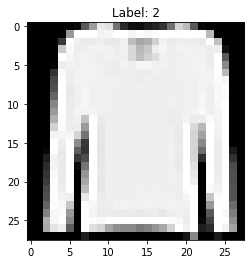

In [53]:
index = random.randrange(1000)
plt.imshow(orig_test[index], cmap='gray')
plt.title('Label: %d' % y_test[index])
plt.show()

Data preparation:

In [54]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


Define model:

In [55]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout/2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)              

Train Model:

Epoch 1/20
469/469 [==============================] - 7s 14ms/step - loss: 0.6135 - accuracy: 0.7827 - val_loss: 0.3669 - val_accuracy: 0.8653
Epoch 2/20
469/469 [==============================] - 7s 14ms/step - loss: 0.4091 - accuracy: 0.8548 - val_loss: 0.3066 - val_accuracy: 0.8888
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 0.3548 - accuracy: 0.8749 - val_loss: 0.2858 - val_accuracy: 0.8979
Epoch 4/20
469/469 [==============================] - 7s 14ms/step - loss: 0.3200 - accuracy: 0.8851 - val_loss: 0.2658 - val_accuracy: 0.9022
Epoch 5/20
469/469 [==============================] - 6s 14ms/step - loss: 0.2964 - accuracy: 0.8934 - val_loss: 0.2441 - val_accuracy: 0.9129
Epoch 6/20
469/469 [==============================] - 7s 14ms/step - loss: 0.2754 - accuracy: 0.9010 - val_loss: 0.2437 - val_accuracy: 0.9123
Epoch 7/20
469/469 [==============================] - 6s 14ms/step - loss: 0.2597 - accuracy: 0.9056 - val_loss: 0.2468 - val_accuracy: 0.9115

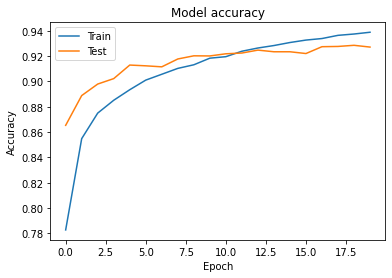

In [56]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train model for a given number of epochs
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# Evaluate model against test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Predictions:

In [0]:
predictions = model.predict(x_test)
most_likely = predictions.argmax(1)

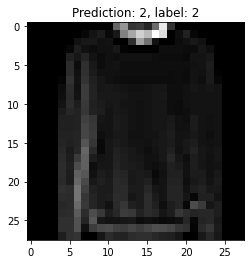

In [58]:
index = random.randrange(10000)
plt.title('Prediction: %d, label: %d' % (most_likely[index], y_test[index]))
plt.imshow(orig_test[index], cmap='gray')
plt.show()

Error analysis:

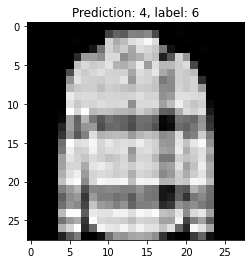

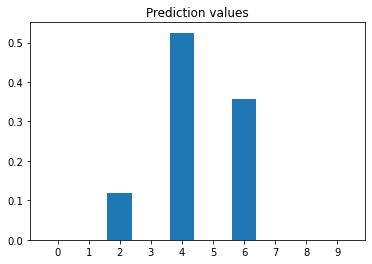

In [59]:
for i in range(10000):
    index = random.randrange(10000)
    if most_likely[index] != y_test[index]:
        break

plt.imshow(orig_test[index], cmap='gray')
plt.title('Prediction: %d, label: %d' % (most_likely[index], y_test[index]))
plt.show()

plt.bar(range(10), predictions[index], tick_label=range(10))
plt.title('Prediction values')
plt.show()

Using my own images:

In [0]:
from skimage import io, transform